# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | letychiv
City not found. Skipping...
Processing Record 2 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 3 of Set 1 | lebu
City not found. Skipping...
Processing Record 4 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
City not found. Skipping...
Processing Record 6 of Set 1 | bethel
City not found. Skipping...
Processing Record 7 of Set 1 | al jawf
City not found. Skipping...
Processing Record 8 of Set 1 | atafu village
City not found. Skipping...
Processing Record 9 of Set 1 | toga village
City not found. Skipping...
Processing Record 10 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
City not found. Skipping...
Processing Record 12 of Set 1 | plato
City not found. Skipping...
Processing Record 13 of Set 1 | wronki
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdo

City not found. Skipping...
Processing Record 17 of Set 3 | padangsidempuan
City not found. Skipping...
Processing Record 18 of Set 3 | vrindavan
City not found. Skipping...
Processing Record 19 of Set 3 | saint croix
City not found. Skipping...
Processing Record 20 of Set 3 | kruisfontein
City not found. Skipping...
Processing Record 21 of Set 3 | bilibino
City not found. Skipping...
Processing Record 22 of Set 3 | nemuro
City not found. Skipping...
Processing Record 23 of Set 3 | grootfontein
City not found. Skipping...
Processing Record 24 of Set 3 | whitehorse
City not found. Skipping...
Processing Record 25 of Set 3 | albany
City not found. Skipping...
Processing Record 26 of Set 3 | marquette
City not found. Skipping...
Processing Record 27 of Set 3 | igarka
City not found. Skipping...
Processing Record 28 of Set 3 | longyearbyen
City not found. Skipping...
Processing Record 29 of Set 3 | tolanaro
City not found. Skipping...
Processing Record 30 of Set 3 | lihue
City not found. S

Processing Record 40 of Set 5 | st. john's
Processing Record 41 of Set 5 | tura
Processing Record 42 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 43 of Set 5 | el alto
Processing Record 44 of Set 5 | okondja
Processing Record 45 of Set 5 | hammerfest
Processing Record 46 of Set 5 | east london
Processing Record 47 of Set 5 | taksimo
Processing Record 48 of Set 5 | jiwani
Processing Record 49 of Set 5 | eyl
Processing Record 0 of Set 6 | saudarkrokur
Processing Record 1 of Set 6 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 6 | pauini
Processing Record 3 of Set 6 | talnakh
Processing Record 4 of Set 6 | les cayes
Processing Record 5 of Set 6 | brisas de zicatela
Processing Record 6 of Set 6 | magdagachi
Processing Record 7 of Set 6 | olavarria
Processing Record 8 of Set 6 | stanley
Processing Record 9 of Set 6 | khabary
Processing Record 10 of Set 6 | aktau
Processing Record 11 of Set 6 | sao joao da barra
Processing Record 12 of Set 6 | 

Processing Record 34 of Set 9 | eynesil
Processing Record 35 of Set 9 | charters towers
Processing Record 36 of Set 9 | kirakira
Processing Record 37 of Set 9 | colby
Processing Record 38 of Set 9 | mundwa
Processing Record 39 of Set 9 | wynyard
Processing Record 40 of Set 9 | taltal
Processing Record 41 of Set 9 | nago
Processing Record 42 of Set 9 | al kharijah
Processing Record 43 of Set 9 | dryden
Processing Record 44 of Set 9 | karatau
Processing Record 45 of Set 9 | huilong
Processing Record 46 of Set 9 | nogliki
Processing Record 47 of Set 9 | mhamid
Processing Record 48 of Set 9 | nagarpur
Processing Record 49 of Set 9 | eraan
Processing Record 0 of Set 10 | port lincoln
Processing Record 1 of Set 10 | san rafael
Processing Record 2 of Set 10 | byron bay
Processing Record 3 of Set 10 | maluso
Processing Record 4 of Set 10 | suicheng
Processing Record 5 of Set 10 | boende
Processing Record 6 of Set 10 | tarnogskiy gorodok
Processing Record 7 of Set 10 | tanjung pandan
Processing

In [15]:
test_url = f"https://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}"
response = requests.get(test_url).json()
print(response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.9, 'feels_like': 281.08, 'temp_min': 281.21, 'temp_max': 284.4, 'pressure': 994, 'humidity': 94, 'sea_level': 994, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 3.51, 'deg': 200, 'gust': 11.47}, 'clouds': {'all': 10}, 'dt': 1698639303, 'sys': {'type': 2, 'id': 2006068, 'country': 'GB', 'sunrise': 1698648577, 'sunset': 1698683914}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [4]:
response = requests.get(city_url)
print(response.json())  # This will print the entire JSON response

{'coord': {'lon': -99.8901, 'lat': 16.8634}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.07, 'feels_like': 303.17, 'temp_min': 300.07, 'temp_max': 300.07, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 302, 'gust': 3.1}, 'clouds': {'all': 60}, 'dt': 1698639463, 'sys': {'country': 'MX', 'sunrise': 1698582973, 'sunset': 1698624609}, 'timezone': -21600, 'id': 3533462, 'name': 'Acapulco de Juárez', 'cod': 200}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          374
Lat           374
Lng           374
Max Temp      374
Humidity      374
Cloudiness    374
Wind Speed    374
Country       374
Date          374
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mutum biyu,8.6333,10.7667,299.34,60,100,1.17,NG,1698639114
1,balabac,7.9868,117.0645,303.36,69,94,5.32,PH,1698639115
2,callao,-12.0667,-77.1500,294.66,82,0,5.14,PE,1698639116
3,codrington,-38.2667,141.9667,289.88,46,73,9.40,AU,1698639118
4,salalah,17.0151,54.0924,298.20,83,0,0.51,OM,1698639119


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mutum biyu,8.6333,10.7667,299.34,60,100,1.17,NG,1698639114
1,balabac,7.9868,117.0645,303.36,69,94,5.32,PH,1698639115
2,callao,-12.0667,-77.1500,294.66,82,0,5.14,PE,1698639116
3,codrington,-38.2667,141.9667,289.88,46,73,9.40,AU,1698639118
4,salalah,17.0151,54.0924,298.20,83,0,0.51,OM,1698639119


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

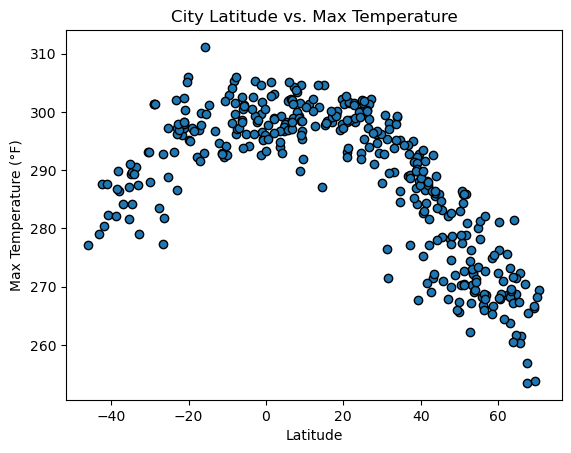

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

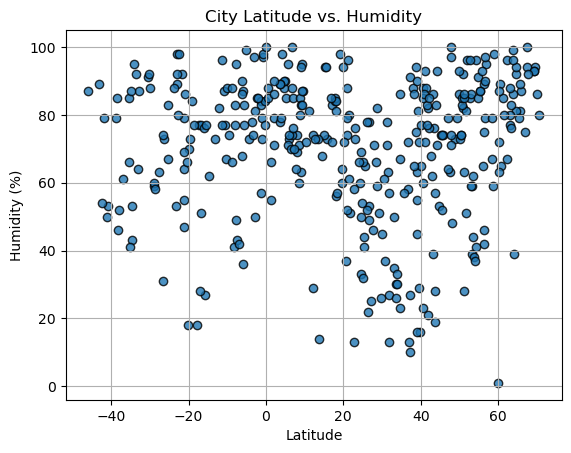

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

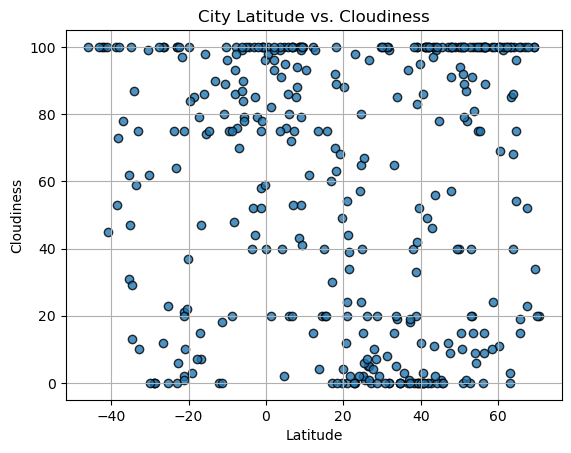

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

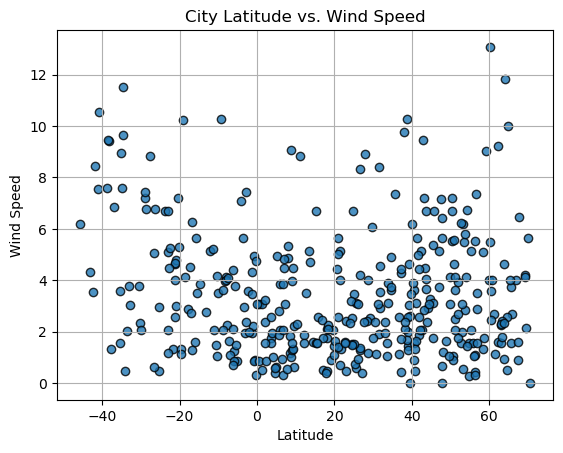

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=14, color="red")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mutum biyu,8.6333,10.7667,299.34,60,100,1.17,NG,1698639114
1,balabac,7.9868,117.0645,303.36,69,94,5.32,PH,1698639115
4,salalah,17.0151,54.0924,298.20,83,0,0.51,OM,1698639119
5,kodinsk,58.6881,99.1844,266.73,59,24,1.74,RU,1698639120
6,la sarre,48.8002,-79.1996,272.02,73,100,1.64,CA,1698639121


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,callao,-12.0667,-77.1500,294.66,82,0,5.14,PE,1698639116
3,codrington,-38.2667,141.9667,289.88,46,73,9.40,AU,1698639118
10,lamu,-2.2717,40.9020,298.27,85,79,3.56,KE,1698639130
16,el alto,-4.2714,-81.2147,294.09,73,100,7.07,PE,1698639143
17,okondja,-0.6549,13.6753,295.31,97,100,0.88,GA,1698639144


###  Temperature vs. Latitude Linear Regression Plot

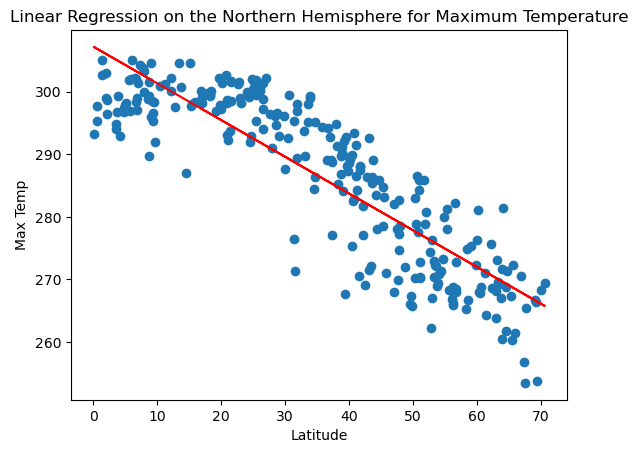

In [22]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

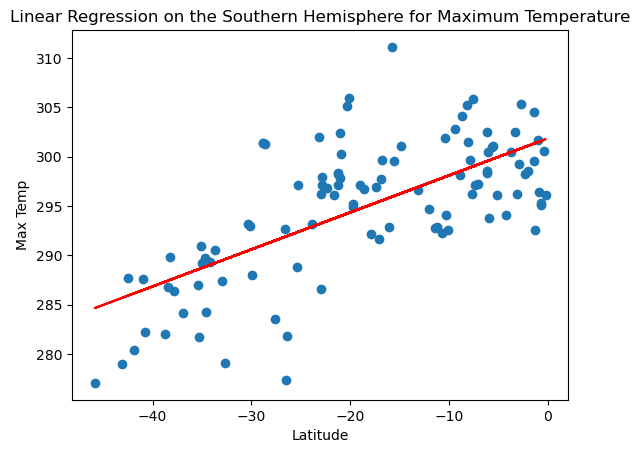

In [23]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

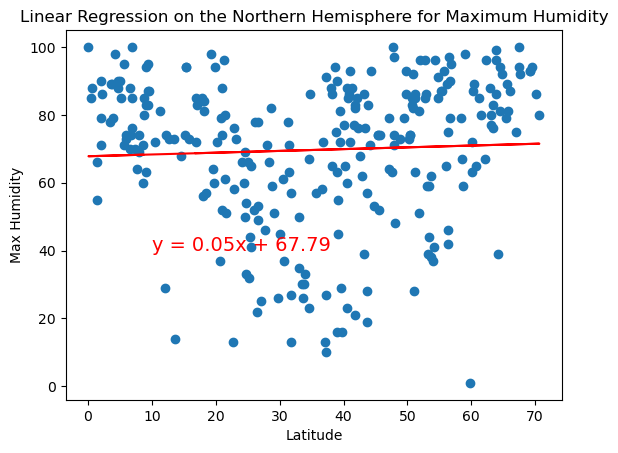

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression on the Northern Hemisphere for Maximum Humidity", "Max Humidity", (10,40))

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE